In [17]:
import math

def getAD(d_A):
    standardKpc = 10
    arcseconds = d_A / standardKpc
          
    a = 2 * math.pi * arcseconds / (360 * 3600)
    
    return d_A * 1000 * 1000 * a

In [18]:
data = []

z = 0
pc2ly = 3.261564
while z < 10:
    
    d_A = z / (1 + z) * 13.8 * 1000 ##* pc2ly
    d_ATL =  math.log(1 + z) * 13.8 * 1000 ##* pc2ly
        
    data.append([z, getAD(d_A), getAD(d_ATL)])
    
    z += 0.1

In [19]:
import cosmolopy.distance as cd

H0km = 70
ΩΛ = 0.7
Ωm = 0.3

H0 = H0km / 3.08e19 * 60*60*24*365 * 1e6

cosmo = {'omega_M_0' : Ωm, 'omega_lambda_0' : ΩΛ, 'h' : H0km/100}
cosmo = cd.set_omega_k_0(cosmo)

data2 = []

z = 0
pc2ly = 3.261564
while z < 10:
    d_A = cd.angular_diameter_distance(z, **cosmo)  * pc2ly
    
    data2.append([z, getAD(d_A)])
    
    z += 0.1

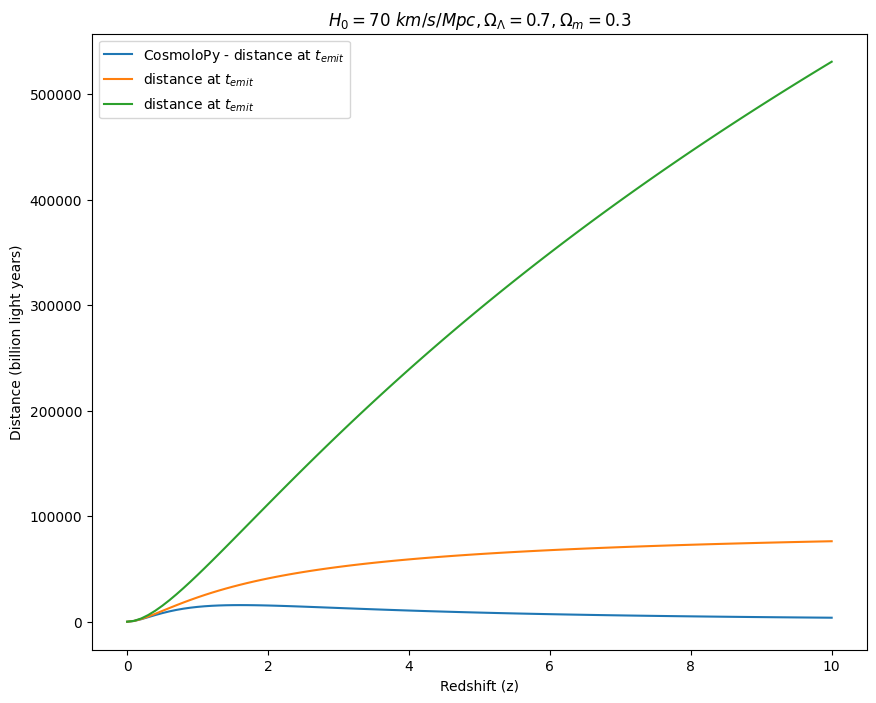

In [20]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
dataA = [row[1]/1000 for row in data] 
dataATL = [row[2]/1000 for row in data] 

dataz2 = [row[0] for row in data2] 
dataA2 = [row[1]/1000 for row in data2] 

plt.figure(figsize=(10,8))
    
plt.plot(dataz2, dataA2, label = "CosmoloPy - distance at $t_{emit}$")

plt.plot(dataz, dataA, label = "distance at $t_{emit}$")

plt.plot(dataz, dataATL, label = "distance at $t_{emit}$")

plt.title("$H_0 = " + str(H0km) + "~km/s/Mpc, \Omega_\Lambda =" + str(ΩΛ) + ", \Omega_m = " + str(Ωm) + "$")
plt.xlabel("Redshift (z)")
plt.ylabel("Distance (billion light years)")
plt.legend()

#plt.savefig('cp4.png',  bbox_inches='tight')
plt.show()